<div style="
    background-color:#c63d32;
    color:white;
    padding:18px 20px;
    border-radius:10px;
    font-size:26px;
    font-weight:600;
    text-align:center;
    margin-bottom:15px;
">
Supermarket Sales: Analysis and Total Sales Prediction Per Transaction
</div>

### <span style="font-size:18px;">🛒 <strong>Analysis and Prediction of Total Sales Per Transaction</strong></span>

**Author:** *Ibrahim Munirudeen Oshone*


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor


from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()



import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
np.random.seed(42)

<div style="
    background-color:#c63d32;
    color:white;
    padding:18px 20px;
    border-radius:10px;
    font-size:26px;
    font-weight:600;
    text-align:center;
    margin-bottom:15px;
">
    Introduction
</div>

# Introduction <a class="anchor" id="Introduction"></a>

This project will analyze data gathered from a supermarket sales in order to discover trends, relationships, and indentify patterns that affect total sales . 

The goal of the first phase of this project is to analyze the data. More specifically, it will look at the following business questions:
    
* Which type of customer spends more on average?
* Which product line produces the highest spending?
* What day of the week produces the highest transaction and high-value transactions?
* What time of the day produce high value transactions?
* Which branch yield high and low transaction totals?


The goal of the second phase of this project is to build a model to forecast sales per transaction





<div style="
    background-color:#c63d32;
    color:white;
    padding:18px 20px;
    border-radius:10px;
    font-size:26px;
    font-weight:600;
    text-align:center;
    margin-bottom:15px;
">
Data description
</div>

 # Data description <a class="anchor" id="Description"></a>

Supermarket Sales Data: This dataset records individual transactions from a supermarket chain in Myanmar, with detailed attributes for each sale. The data includes the following columns:

 * __Invoice ID__: Unique identifier for each transaction  
 * __Branch__: Supermarket branch location (e.g., Yangon, Mandalay)  
 * __City__: City in which the supermarket branch is located  
 * __Customer Type__: 'Member' or 'Normal'  
 * __Gender__: Gender of the customer  
 * __Product Line__: Product category (e.g., Health & Beauty, Electronic Accessories, Home & Lifestyle)  
 * __Unit Price__: Price per unit of the product  
 * __Quantity__: Number of items purchased  
 * __Tax 5%__: Calculated tax amount on the transaction at a 5% rate  
 * __Total__: Total amount for the transaction including tax  
 * __Date__: Date of the transaction  
 * __Time__: Time of the transaction  
 * __Payment__: Payment method used (e.g., Cash, Ewallet, Credit card)  
 * __COGS__: Cost of goods sold, representing the raw cost of the products  
 * __Gross Margin Percentage__: Fixed percentage of profit for each sale (4.7619%)  
 * __Gross Income__: Profit earned from the transaction  
 * __Rating__: Customer satisfaction rating (out of 10)  


In [5]:
#load dataset
df = pd.read_csv("data/Supermarket.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
# View Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
#Statistical summary of numerical columns in our dataset
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [8]:
# Describe of categorical columns
df.select_dtypes("object").describe()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,Alex,Yangon,Member,Female,Fashion accessories,2/7/2019,7:48:00 PM,Ewallet
freq,1,340,340,565,571,178,20,7,345


In [9]:
len(df.columns)

17

Initial data exploration reveals the following key points:

- 🧮 **Observations**: The dataset consists of 1,000 rows and 17 columns.  
- ⚠️ **Missing Values**: No missing values are present in the dataset.  
- 📊 **Column Types**: The dataset includes a mix of floats and objects.  
- 💰 **Price**: The highest price per unit is 10.8, while the highest is about 99.96.  
- 🏪 **Store branches**: There are 3 store branches across 3 cities in the dataset.  
- 🔢 **Product**: The dataset contains 6 product lines.  
- 🌍 **Payment Method**: 3 payment methods were used across all transactions.  


<div style="
    background-color:#c63d32;
    color:white;
    padding:18px 20px;
    border-radius:10px;
    font-size:26px;
    font-weight:600;
    text-align:center;
    margin-bottom:15px;
">
Data Preparation
</div>
    
# Data Preparation <a class="anchor" id="Preparation"></a>


In [12]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6


In [13]:
# Check for duplicates
df.duplicated().sum()

0

In [14]:
categorical_cols = ["Branch", "City", "Customer type", "Gender", "Product line", "Payment"]

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}\n")

Branch: ['Alex' 'Giza' 'Cairo']

City: ['Yangon' 'Naypyitaw' 'Mandalay']

Customer type: ['Member' 'Normal']

Gender: ['Female' 'Male']

Product line: ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']

Payment: ['Ewallet' 'Cash' 'Credit card']



# Feature Enginnering <a class="anchor" id="FE"></a>


In [16]:
# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Extract Month
df["Year"] = df["Date"].dt.year

# Extract Month
df["Month"] = df["Date"].dt.month_name()

# Extract Day of Week as names
df["DayOfWeek"] = df["Date"].dt.day_name()

# Extract Hour from Time
df["Hour"] = pd.to_datetime(df["Time"]).dt.hour

In [17]:
# Define a function for time of day
def time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply function to create new column
df["TimeOfDay"] = df["Hour"].apply(time_of_day)


In [18]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,...,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,DayOfWeek,Hour,TimeOfDay
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,2019,January,Saturday,13,Afternoon
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,2019,March,Friday,10,Morning


In [19]:
Columns_to_drop = ["Invoice ID", "Date", "Time"]
df.drop(columns= Columns_to_drop, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Sales                    1000 non-null   float64
 9   Payment                  1000 non-null   object 
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
 14  Year                     

In [45]:
num_cols = ["Unit price", "Quantity", "Tax 5%", "Sales", "cogs", "gross margin percentage",	"gross income",	"Rating", "Hour"]
cat_cols = ["Branch", "City", "Customer type",	"Gender", "Product line", "Payment"]

df[num_cols] = df[num_cols].round(2)
df.head(2)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,DayOfWeek,Hour,TimeOfDay
0,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,Ewallet,522.83,4.76,26.14,9.1,2019,January,Saturday,13,Afternoon
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,Cash,76.40,4.76,3.82,9.6,2019,March,Friday,10,Morning


### Feature Engineering Summary

- 📅 **Date Features**: Extracted **Day**, **Month**, and **Year** from the `Date` column.  
- ⏰ **Time Features**: Extracted **Hour** from the `Time` column.  
- 🕒 **Time of Day**: Created `TimeOfDay` feature with categories: "Morning", "Afternoon", "Evening", and "Night".  
- 🗑️ **Dropped Columns**: Removed `Invoice ID`, `Date`, and `Time` columns as they are no longer needed.
- 
- 🧮 **Resulting Features**: The dataset now includes both original and derived features suitable for analysis and machine learning.


<div style="
    background-color:#c63d32;
    color:white;
    padding:18px 20px;
    border-radius:10px;
    font-size:26px;
    font-weight:600;
    text-align:center;
    margin-bottom:15px;
">
Exploratory Data Analysis
</div>
    
# Exploratory Data Analysis <a class="anchor" id="EDA"></a>


## Count Distribution Across Variables<a class="anchor" id="univariant"></a>


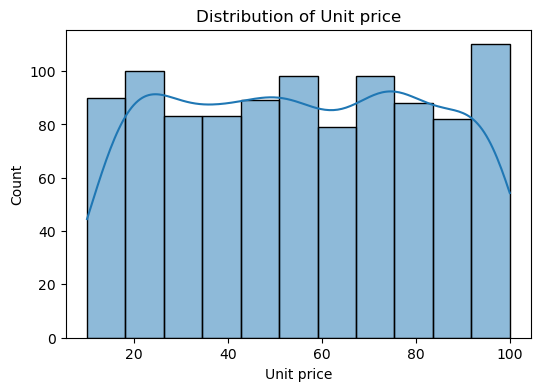

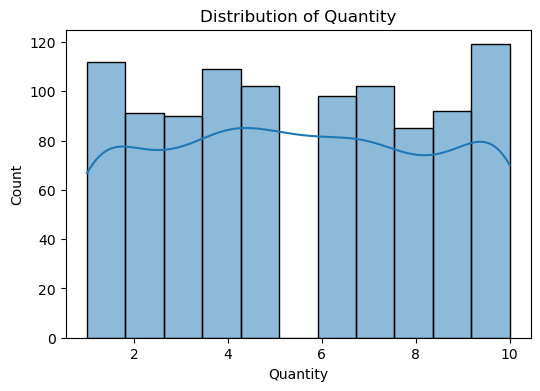

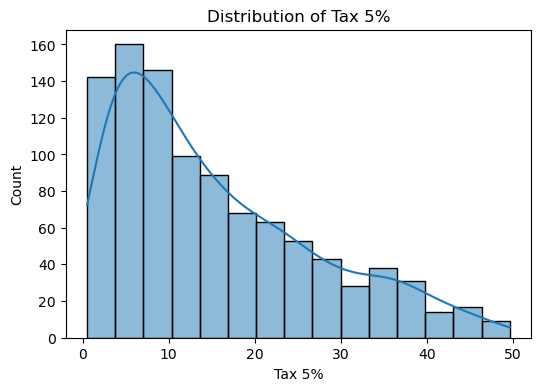

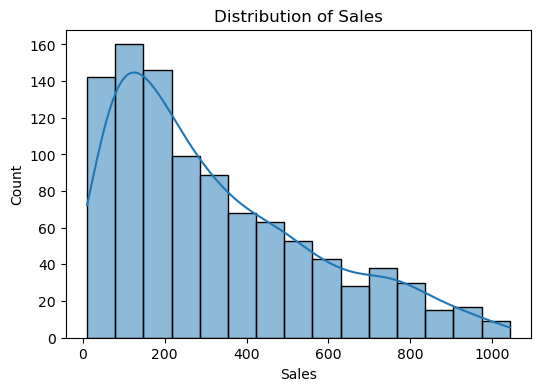

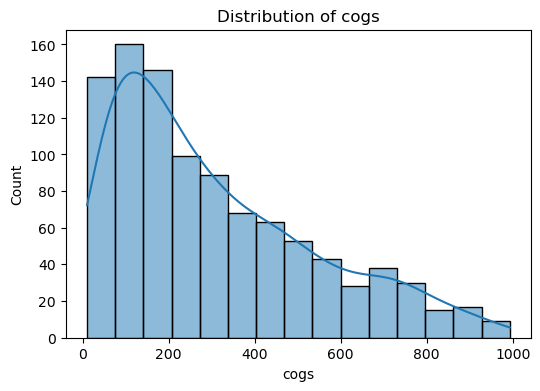

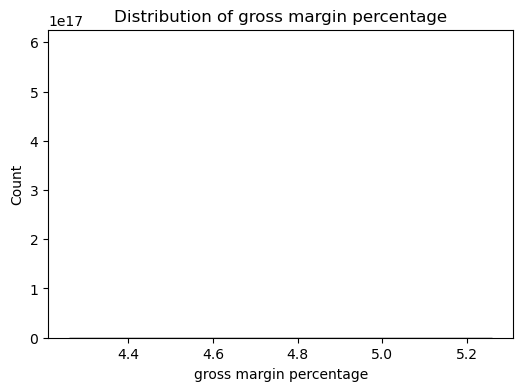

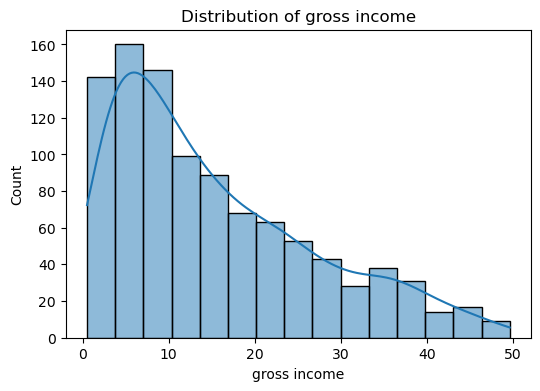

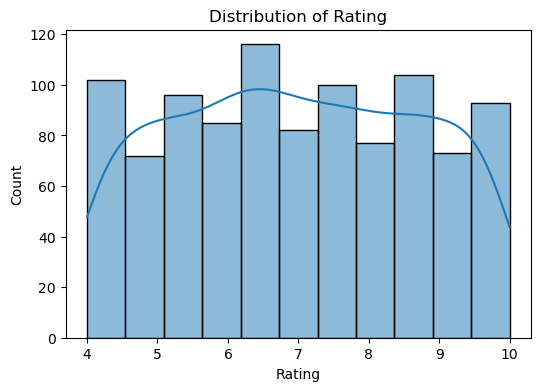

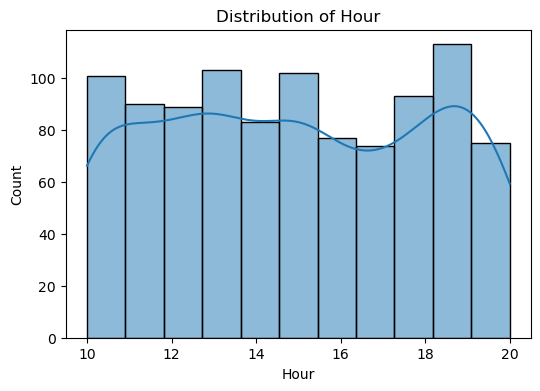

In [35]:
#Distribution of all numerical clomns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


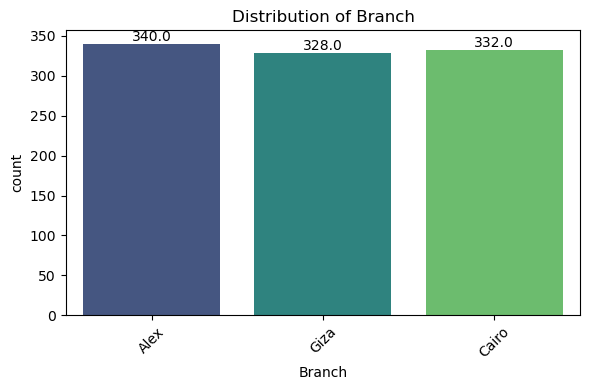

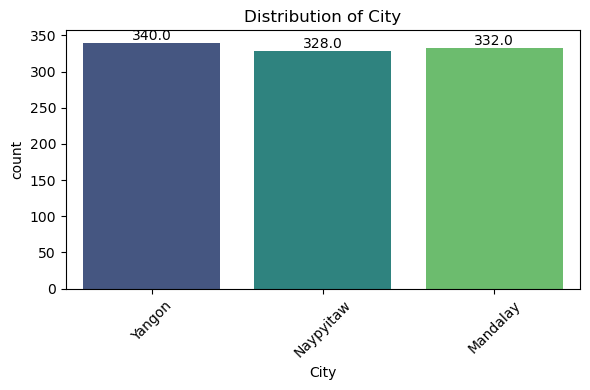

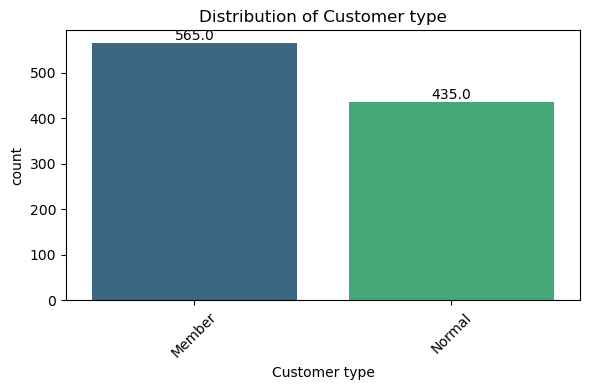

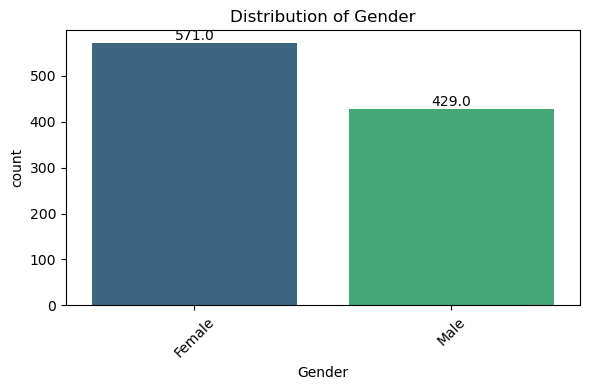

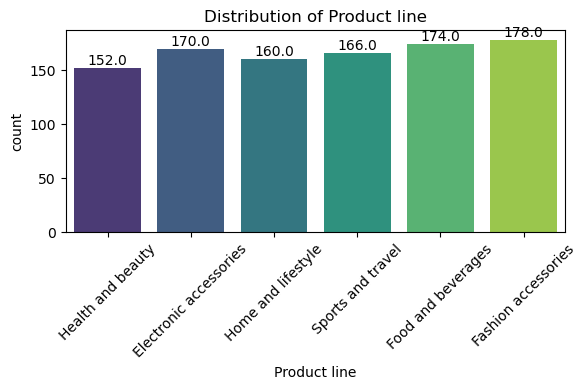

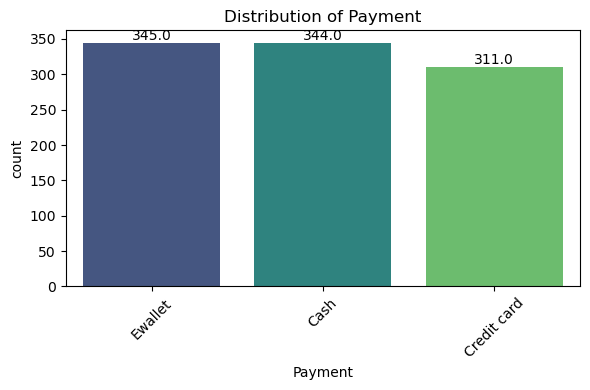

In [52]:
#Distribution of all numerical clomns
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=df, x=col, palette="viridis")  # vertical + colored

    # Add count labels
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
## Cou<a class="anchor" id="bivariant"></a>
